In [460]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

Resources: 
    https://www.kaggle.com/ankandash/pca-k-means-clustering-hierarchical-clustering
        https://www.reneshbedre.com/blog/principal-component-analysis.html

# ATO Analysis

In this notebook we employ only the ATO data set to see clustering results and to see if removing Demographic Variables provides different, better or worst clusters. 

In [461]:
#reading the ATO data set 
income = pd.read_csv("C:\\Users\\rijwa\\Downloads\\COMP220 Proj\\Data Files\\IncomeandRent2016Analysis.csv")
income.head()

,Postcode,Count taxable income or loss,Average taxable income or loss,Median taxable income or loss,Count salary and wages,Average salary and wages,Median salary and wages,Count net rent,Average net rent,Median net rent,...,Median total business income,Count total business expenses,Average total business expenses,Median total business expenses,Count net tax,Average net tax,Median net tax,Count super total accounts balance,Average super total accounts balance,Median super total accounts balance
0,2000,24207,68607,25828,20465,52595,26186,2608,492,-420,...,22080,1395,197860,14998,14304,35296,8571,44616,88340,1219
1,2006,79,82018,53192,66,84414,69154,20,4368,4148,...,37440,3,41247,37177,57,32740,19577,120,98720,19776
2,2007,4879,47040,31049,4275,47486,33284,519,-1026,-1654,...,18532,320,149251,8214,3099,16119,9233,6952,42250,4267
3,2008,6025,82162,40289,5372,53977,42505,670,61,-906,...,18000,494,30197,7579,4244,36981,10972,8081,55885,9029
4,2009,9763,84475,52414,8179,75281,56378,1679,-2595,-1393,...,23795,673,93747,10851,7373,32797,15451,12889,131020,19841


Here we can see that we have roughly 27 variables. We do not need all these variables to conduct analysis and hence all Count columns can be dropped. For the this analysis, we are opting to use Median values instead of Average as Median is more useful when using Income Data. 

https://surveymethods.com/when-is-it-generally-better-to-use-median-over-mean/#:~:text=Median%2C%20on%20the%20other%20hand%2C%20is%20the%2050%25,lot%20of%20analysis%2C%20the%20mean%20is%20very%20useful

In [462]:
#Creating a data frame with only the median values
ato = pd.DataFrame(income, columns = ['Postcode','Median taxable income or loss', 'Median salary and wages','Median net rent','Median total income or loss','Median total deductions','Median total business income', 'Median total business expenses', 'Median net tax','Median super total accounts balance'])
ato.head()
ato.shape

(2470, 10)

# Univariate Analysis

In [463]:
#Inspecting data set to see if there are any null values.
ato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Postcode                             2470 non-null   int64
 1   Median taxable income or loss        2470 non-null   int64
 2   Median salary and wages              2470 non-null   int64
 3   Median net rent                      2470 non-null   int64
 4   Median total income or loss          2470 non-null   int64
 5   Median total deductions              2470 non-null   int64
 6   Median total business income         2470 non-null   int64
 7   Median total business expenses       2470 non-null   int64
 8   Median net tax                       2470 non-null   int64
 9   Median super total accounts balance  2470 non-null   int64
dtypes: int64(10)
memory usage: 193.1 KB


In [464]:
#understanding the data summary 
ato.describe()

,Postcode,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance
count,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2.470000e+03,2.470000e+03,2470.000000,2470.000000
mean,4097.294332,41958.035223,45817.263563,-1051.731579,44349.316599,646.847773,3.326066e+04,1.990433e+04,10029.780567,44524.489474
std,1496.300821,8858.756984,9270.405387,1808.909304,9213.322116,272.502904,2.814111e+04,2.579349e+04,3436.067296,17166.058391
min,800.000000,13226.000000,11462.000000,-13830.000000,13909.000000,0.000000,8.020000e+02,0.000000e+00,1416.000000,1086.000000
25%,2842.250000,36423.250000,39958.250000,-2063.500000,38354.500000,465.000000,2.619975e+04,1.263000e+04,7702.500000,34867.750000
50%,3873.500000,41052.500000,45080.500000,-944.000000,43381.000000,625.000000,3.040350e+04,1.596900e+04,9314.000000,42957.500000
75%,5165.750000,46514.250000,50501.500000,-22.250000,48881.000000,771.750000,3.622950e+04,2.293050e+04,11645.750000,52384.000000
max,7470.000000,111291.000000,119247.000000,11918.000000,114135.000000,3354.000000,1.284290e+06,1.152908e+06,38232.000000,355380.000000


In [465]:
# Checking the percentage of missing values
round(100*(ato.isnull().sum()/len(ato.index)), 2)

Postcode                               0.0
Median taxable income or loss          0.0
Median salary and wages                0.0
Median net rent                        0.0
Median total income or loss            0.0
Median total deductions                0.0
Median total business income           0.0
Median total business expenses         0.0
Median net tax                         0.0
Median super total accounts balance    0.0
dtype: float64

In [466]:
ato.columns

Index(['Postcode', 'Median taxable income or loss', 'Median salary and wages',
       'Median net rent', 'Median total income or loss',
       'Median total deductions', 'Median total business income',
       'Median total business expenses', 'Median net tax',
       'Median super total accounts balance'],
      dtype='object')

We will now use histograms to inspect normality of the data

<AxesSubplot:xlabel='Median super total accounts balance', ylabel='Count'>

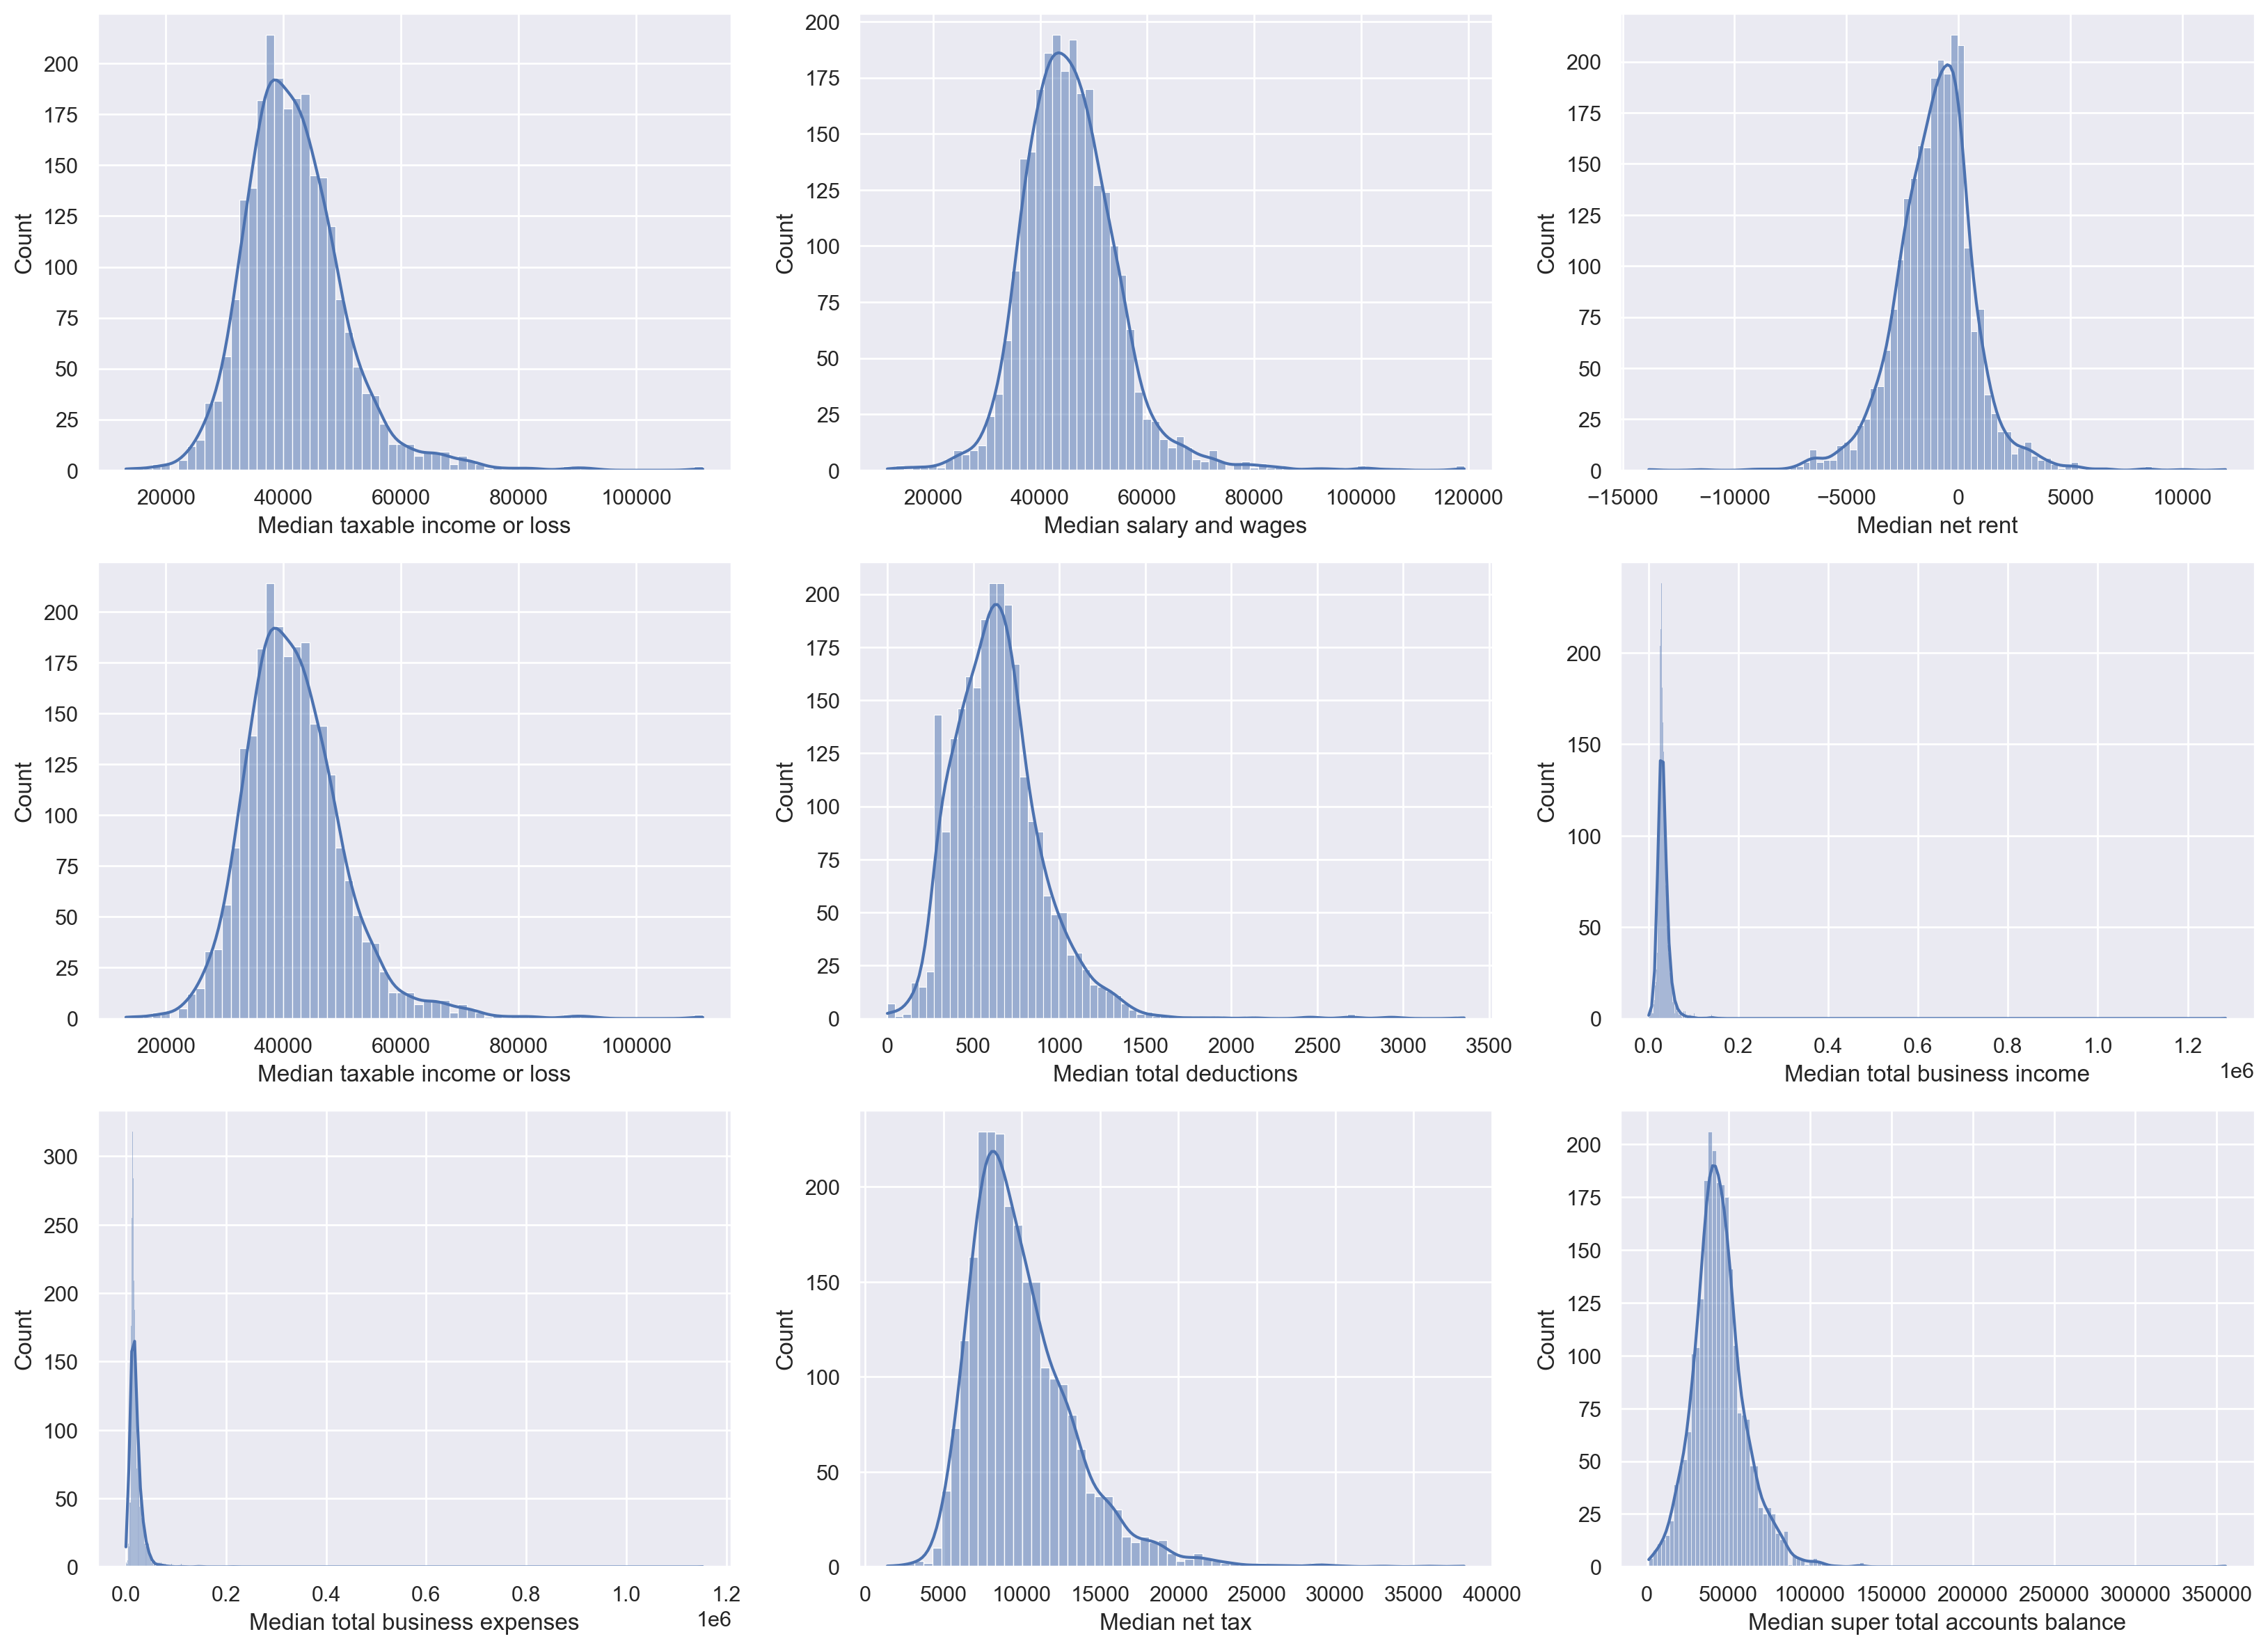

In [467]:
# checking for normality using histograms

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.histplot(data=ato, x="Median taxable income or loss", kde=True)

plt.subplot(4,3,2)
sns.histplot(data=ato, x="Median salary and wages", kde=True)
plt.subplot(4,3,3)
sns.histplot(data=ato, x="Median net rent", kde=True)

plt.subplot(4,3,4)
sns.histplot(data=ato, x="Median taxable income or loss", kde=True)

plt.subplot(4,3,5)
sns.histplot(data=ato, x="Median total deductions", kde=True)

plt.subplot(4,3,6)
sns.histplot(data=ato, x="Median total business income", kde=True)

plt.subplot(4,3,7)
sns.histplot(data=ato, x="Median total business expenses", kde=True)

plt.subplot(4,3,8)
sns.histplot(data=ato, x="Median net tax", kde=True)

plt.subplot(4,3,9)
sns.histplot(data=ato, x="Median super total accounts balance", kde=True)

From the subplots above, we can see that the data is fairly normal, however, seems rightly skewed due to outliers. We will use boxplot to check for these outliers. 

<AxesSubplot:xlabel='Median super total accounts balance'>

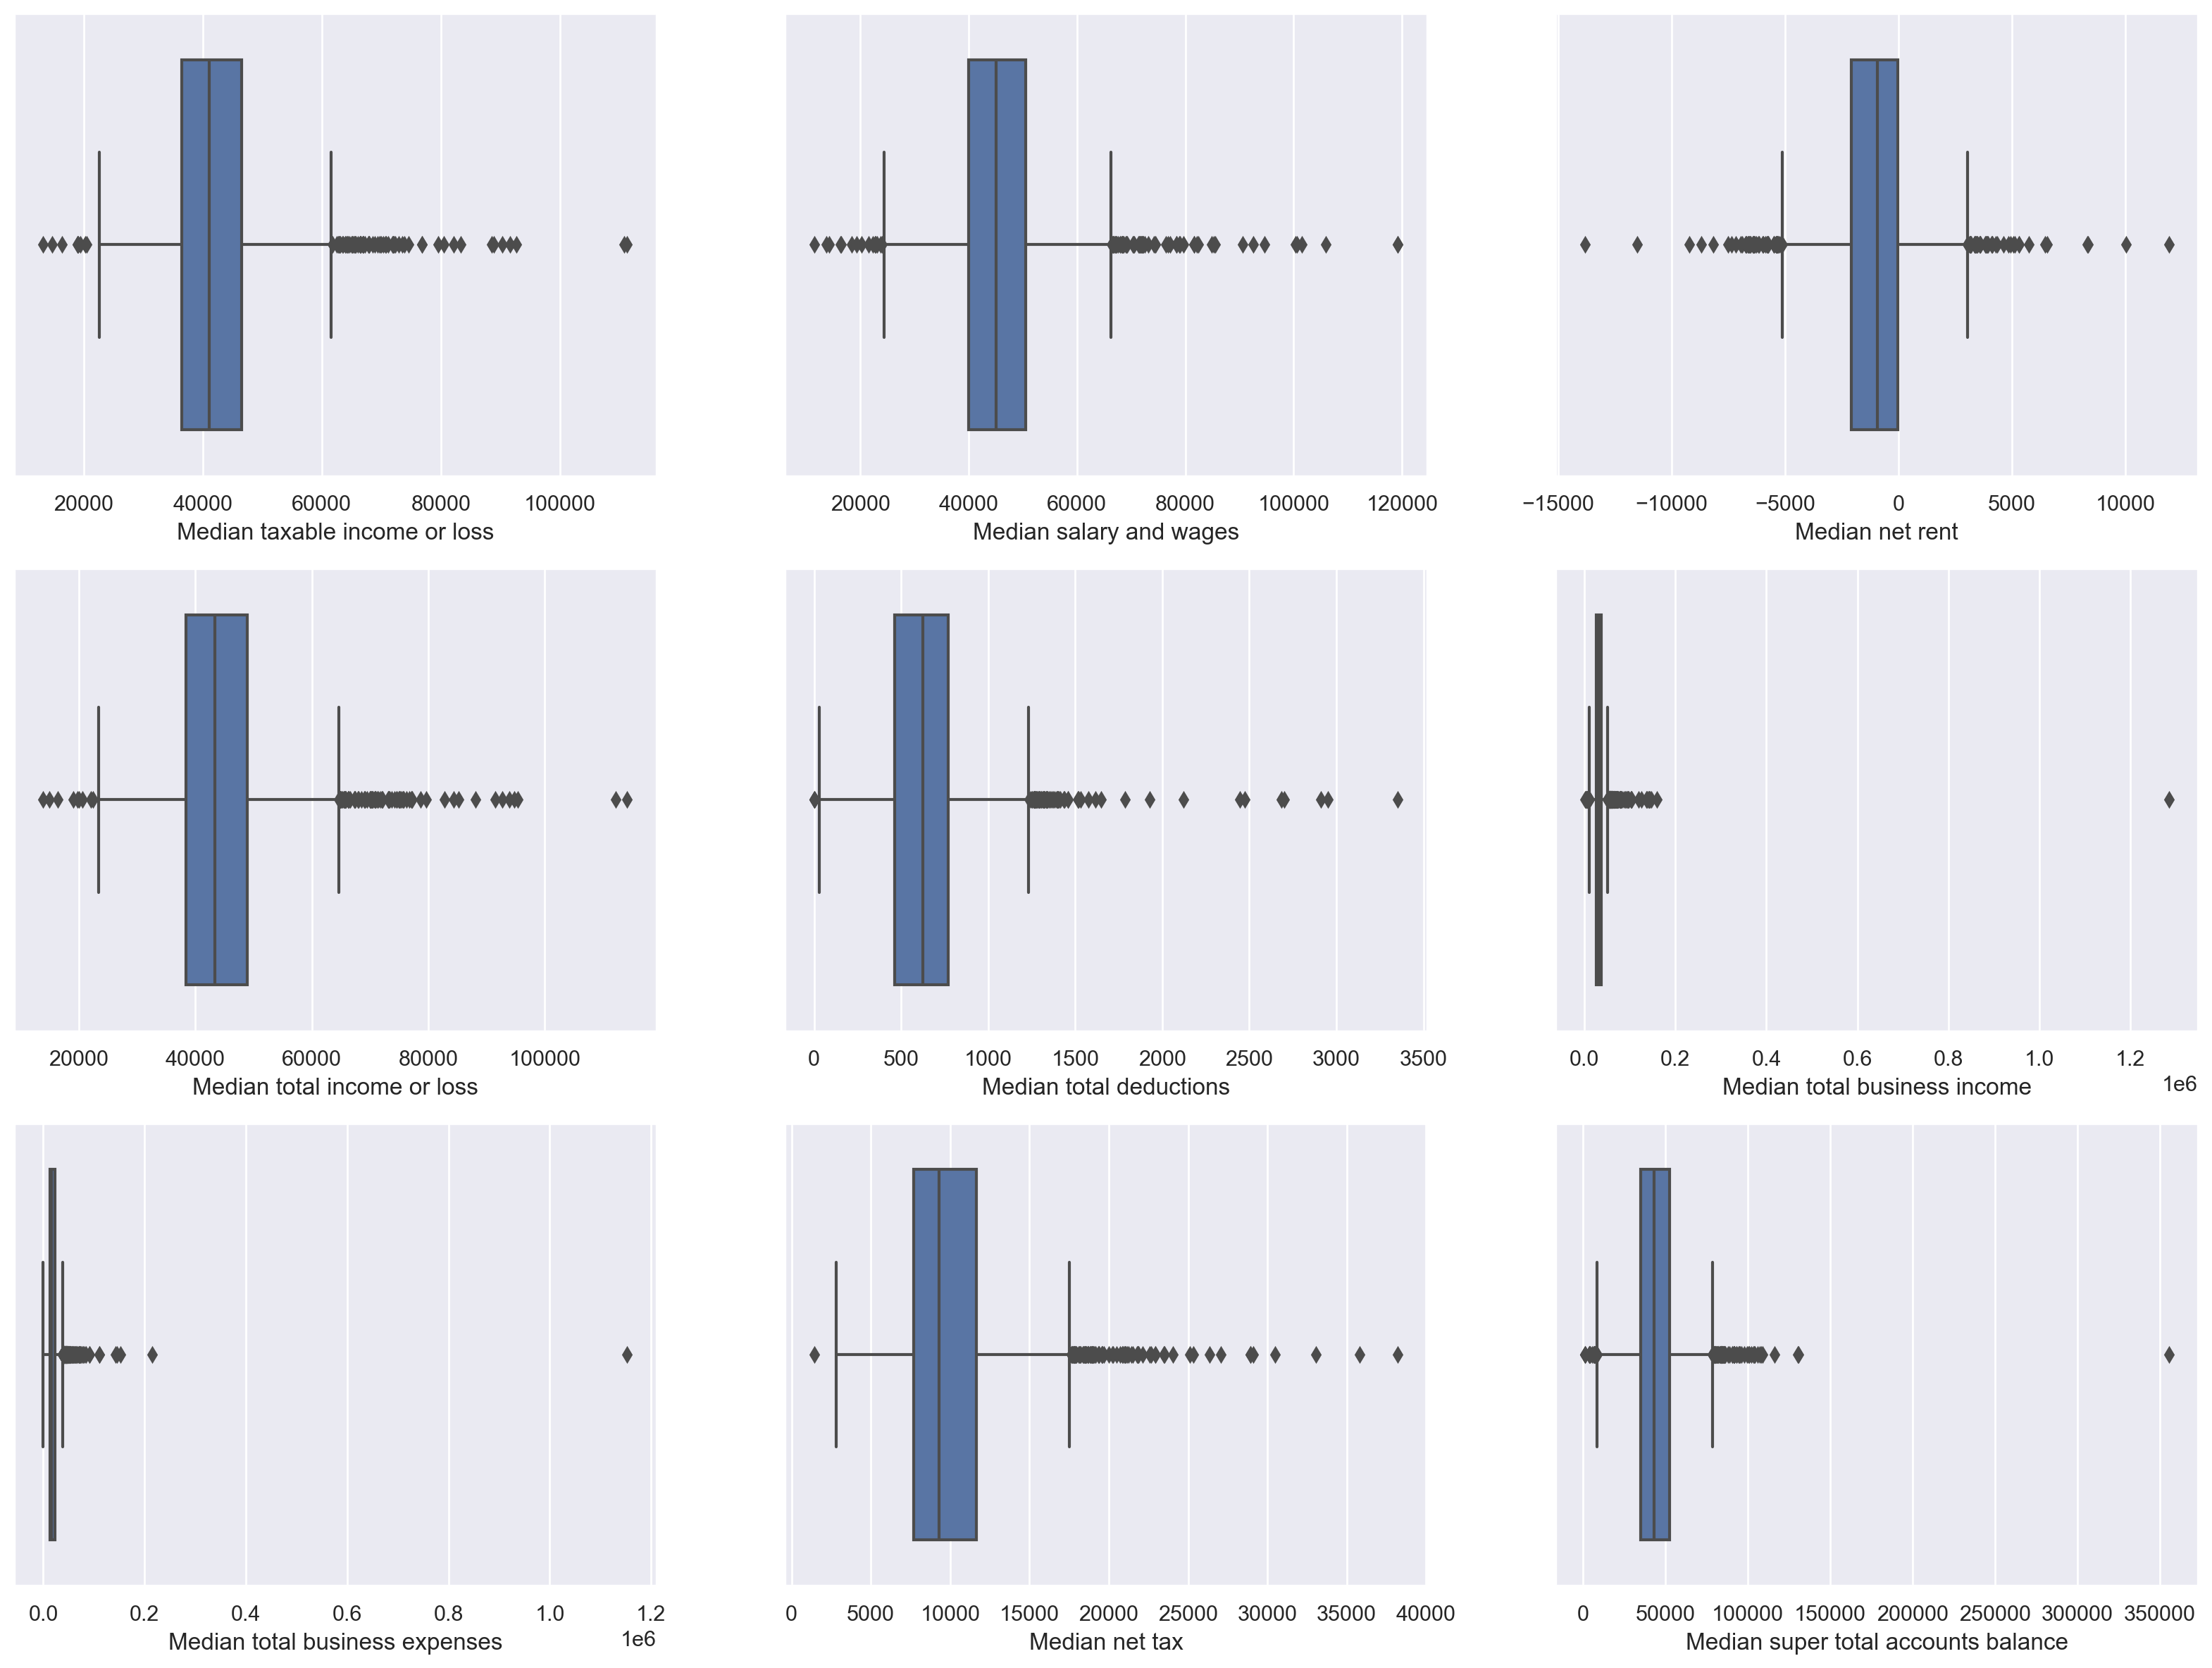

In [468]:
# checking for outliers using box-plots

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'Median taxable income or loss', data = ato)

plt.subplot(4,3,2)
sns.boxplot(x = 'Median salary and wages', data = ato)

plt.subplot(4,3,3)
sns.boxplot(x = 'Median net rent', data = ato)

plt.subplot(4,3,4)
sns.boxplot(x = 'Median total income or loss', data = ato)

plt.subplot(4,3,5)
sns.boxplot(x = 'Median total deductions', data = ato)

plt.subplot(4,3,6)
sns.boxplot(x = 'Median total business income', data = ato)

plt.subplot(4,3,7)
sns.boxplot(x = 'Median total business expenses', data = ato)

plt.subplot(4,3,8)
sns.boxplot(x = 'Median net tax', data = ato)

plt.subplot(4,3,9)
sns.boxplot(x = 'Median super total accounts balance', data = ato)

In [469]:
# checking for outliers using the Z-score

from scipy import stats

z = np.abs(stats.zscore(ato[['Median taxable income or loss', 'Median salary and wages',
       'Median net rent', 'Median total income or loss',
       'Median total deductions', 'Median total business income',
       'Median total business expenses', 'Median net tax',
       'Median super total accounts balance']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Below are the outlier points along with the respective column numbers in the second array')
print("\n")
print(np.where(z > 3))

[[1.82116988 2.1180561  0.34930413 ... 0.19025436 0.42463544 2.52325009]
 [1.26837654 2.51784695 2.8750941  ... 0.66978789 2.77909361 1.4420026 ]
 [1.2316902  1.35223875 0.33301303 ... 0.45331972 0.23193431 2.34565445]
 ...
 [0.03138376 0.13672759 1.58927284 ... 0.54076258 0.56681478 0.7715907 ]
 [3.13267235 3.94137387 2.91575492 ... 0.28207906 4.08171831 1.95084331]
 [1.33250687 1.17750475 2.06700545 ... 0.006812   0.98947647 0.01558562]]


*******************************************************************************


Below are the outlier points along with the respective column numbers in the second array


(array([  15,   15,   17,   17,   19,   19,   19,   19,   22,   31,   31,
         31,   31,   33,   33,   33,   33,   35,   35,   43,   43,   43,
         45,   45,   45,   46,   46,   46,   46,   47,   47,   47,   71,
         71,   71,   85,   90,  236,  236,  236,  236,  255,  271,  394,
        428,  428,  428,  428,  431,  431,  432,  432,  432,  433,  443,
        443,  

Since outliers can impact clustering, we will remove outliers 

In [470]:
# Removing the outliers
ato_outliers_removed = ato[(z<3).all(axis=1)]

In [471]:
ato_outliers_removed.head()

,Postcode,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance
0,2000,25828,26186,-420,26811,280,22080,14998,8571,1219
1,2006,53192,69154,4148,54338,876,37440,37177,19577,19776
2,2007,31049,33284,-1654,32450,300,18532,8214,9233,4267
3,2008,40289,42505,-906,42123,392,18000,7579,10972,9029
4,2009,52414,56378,-1393,54867,567,23795,10851,15451,19841


In [472]:
print('Shape of dataframe before outlier removal: ' + str(ato.shape))
print("\n")
print('Shape of dataframe after outlier removal: ' + str(ato_outliers_removed.shape))

Shape of dataframe before outlier removal: (2470, 10)


Shape of dataframe after outlier removal: (2374, 10)


In [473]:
X = ato_outliers_removed.drop('Postcode',axis =1)  
y = ato_outliers_removed['Postcode']

In [474]:
X.shape

(2374, 9)

In [475]:
y.shape

(2374,)

# Bivariate Analysis

We will now conduct bivariate analysis to inspect colinearity.

<AxesSubplot:>

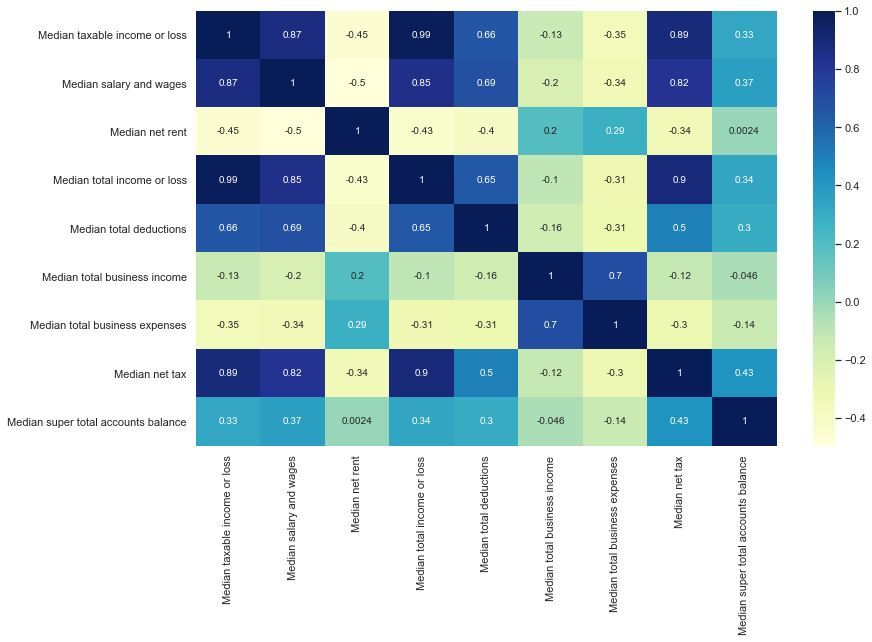

In [476]:
# Let's see the correlation matrix 
plt.figure(figsize = (13,8))       
sns.heatmap(X_scaled_df.corr(),annot = True, cmap="YlGnBu")

We can see high correlation among variables. Since the variables are not all the same and we can run into risk of artifically bringing the data together, we will use PCA instead.

# PCA Analysis

In [477]:
X.head()

,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance
0,25828,26186,-420,26811,280,22080,14998,8571,1219
1,53192,69154,4148,54338,876,37440,37177,19577,19776
2,31049,33284,-1654,32450,300,18532,8214,9233,4267
3,40289,42505,-906,42123,392,18000,7579,10972,9029
4,52414,56378,-1393,54867,567,23795,10851,15451,19841


In [478]:
y.head()

0    2000
1    2006
2    2007
3    2008
4    2009
Name: Postcode, dtype: int64

In [479]:
# Standardization of the dataset before performing PCA

from sklearn.preprocessing import StandardScaler

In [480]:
scaler = StandardScaler()

In [481]:
X_scaled = scaler.fit_transform(X)

In [482]:
X_scaled[:5,:5]

array([[-2.09800189, -2.49898664,  0.39052495, -2.19729752, -1.53333326],
       [ 1.58802545,  3.10382787,  3.310452  ,  1.3698034 ,  1.04740017],
       [-1.39471477, -1.57344257, -0.39826445, -1.46656471, -1.44673147],
       [-0.15005417, -0.37106982,  0.07986722, -0.21308386, -1.04836322],
       [ 1.48322611,  1.43790071, -0.23142973,  1.43835415, -0.29059753]])

In [483]:
X.columns

Index(['Median taxable income or loss', 'Median salary and wages',
       'Median net rent', 'Median total income or loss',
       'Median total deductions', 'Median total business income',
       'Median total business expenses', 'Median net tax',
       'Median super total accounts balance'],
      dtype='object')

In [484]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [485]:
X_scaled_df.head()

,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance
0,-2.098002,-2.498987,0.390525,-2.197298,-1.533333,-0.987375,-0.425216,-0.419973,-2.874109
1,1.588025,3.103828,3.310452,1.369803,1.047400,0.472951,1.814918,3.408359,-1.628807
2,-1.394715,-1.573443,-0.398264,-1.466565,-1.446731,-1.324695,-1.110417,-0.189703,-2.669567
3,-0.150054,-0.371070,0.079867,-0.213084,-1.048363,-1.375274,-1.174553,0.415192,-2.350004
4,1.483226,1.437901,-0.231430,1.438354,-0.290598,-0.824325,-0.844073,1.973169,-1.624445


In [486]:
from sklearn.decomposition import PCA

In [487]:
pca = PCA(random_state=42)

In [488]:
pca.fit(X_scaled)

PCA(random_state=42)

In [489]:
pca.components_[0]

array([ 0.43411357,  0.42159385, -0.25055532,  0.42821103,  0.34294917,
       -0.13087654, -0.22327932,  0.40432449,  0.19896388])

In [490]:
pca.explained_variance_ratio_

array([0.53425901, 0.1708024 , 0.1103726 , 0.067597  , 0.05631028,
       0.03200999, 0.01753464, 0.01035463, 0.00075946])

In [491]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.53425901, 0.70506141, 0.815434  , 0.883031  , 0.93934128,
       0.97135127, 0.98888591, 0.99924054, 1.        ])

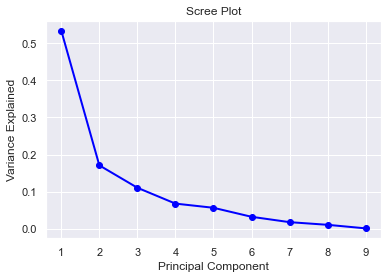

In [492]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

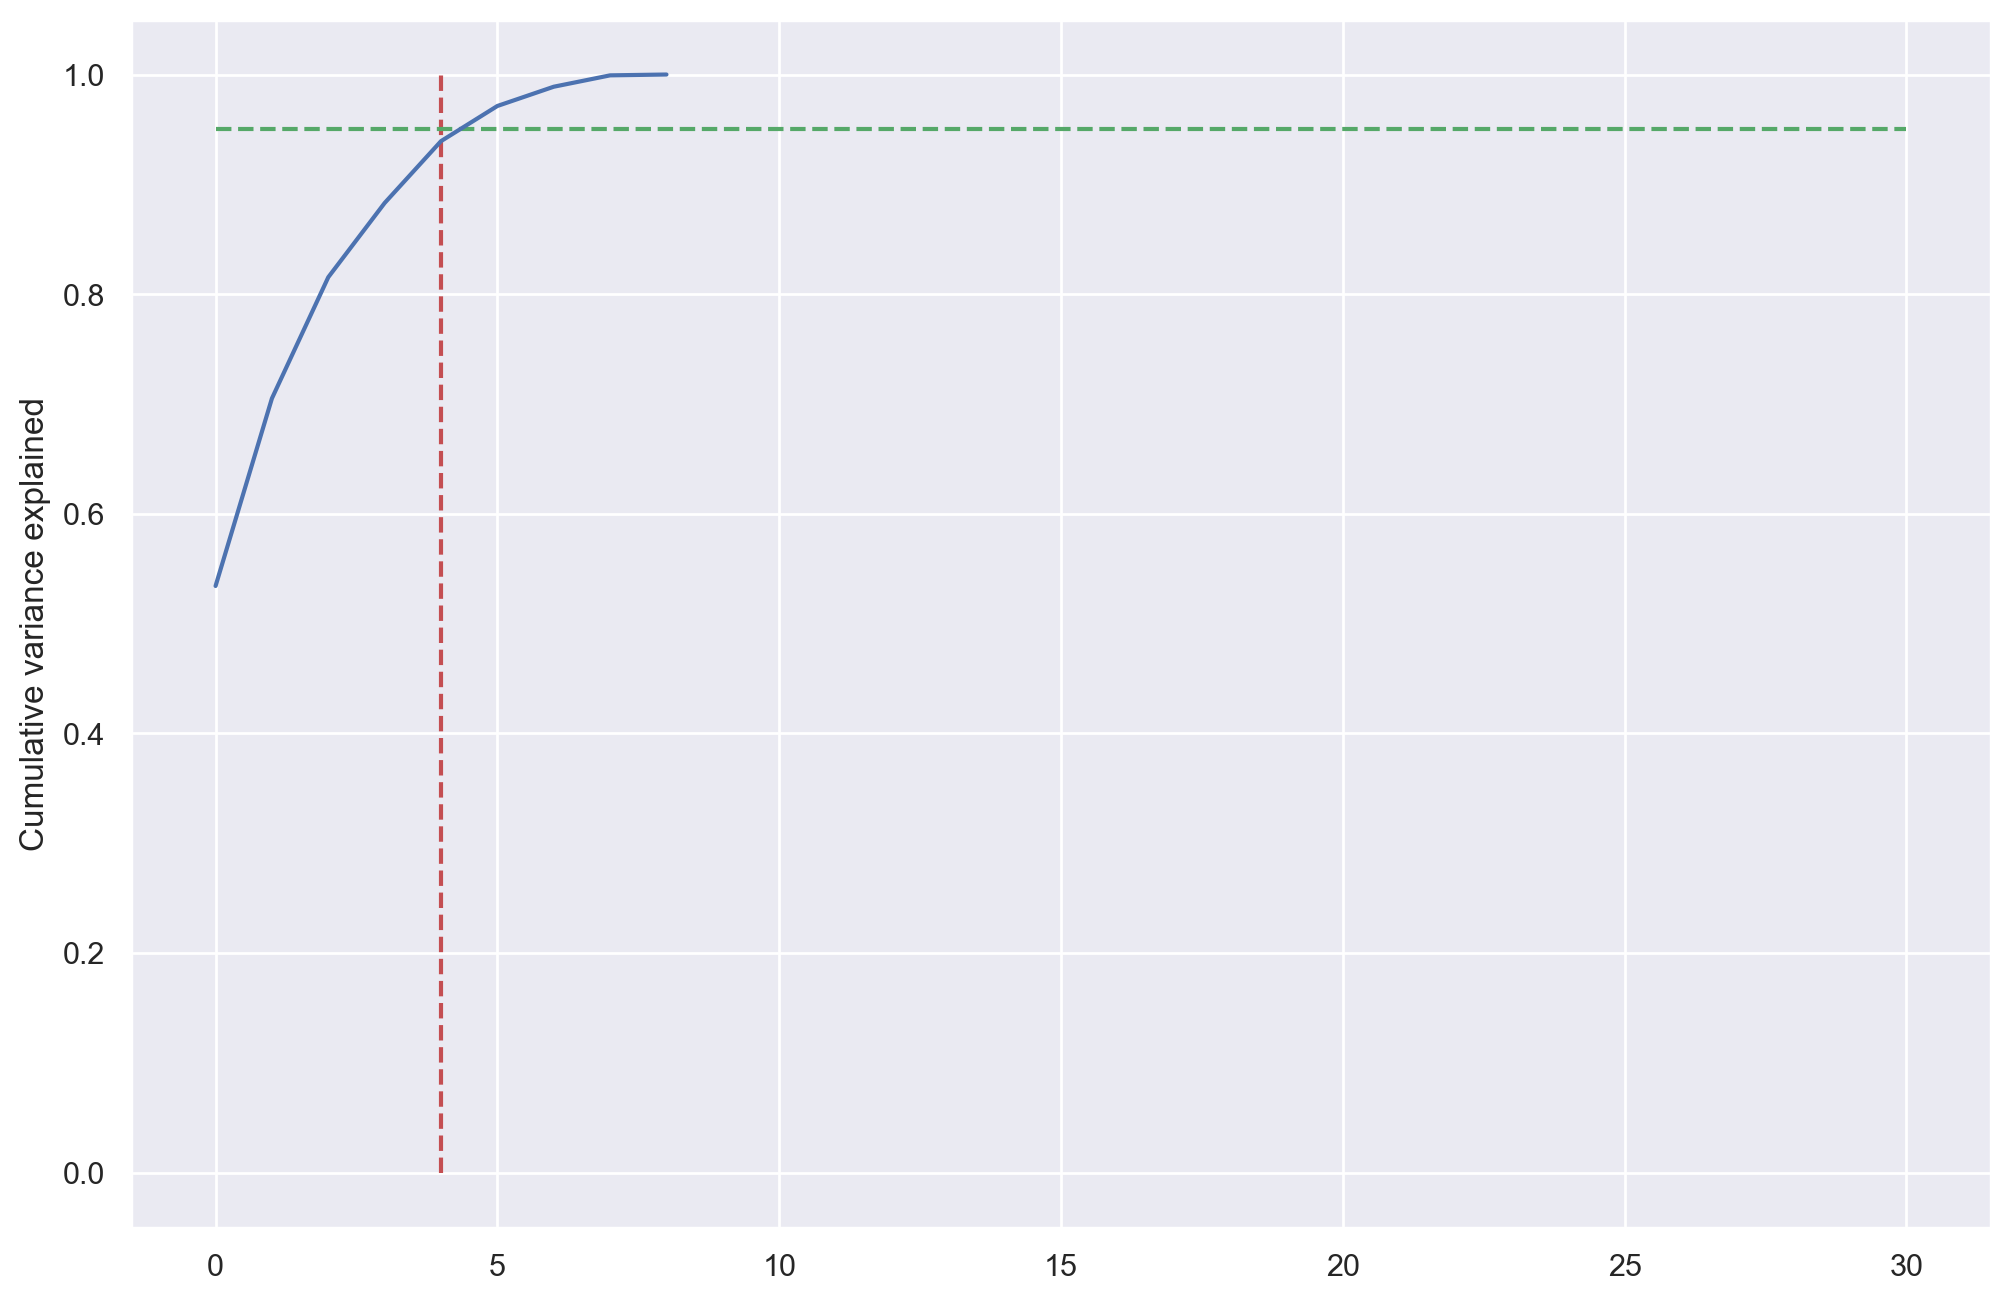

In [493]:
fig = plt.figure(figsize=[12,8],dpi=200)
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

From the scree plot flatening and Principal Components 4 and the cumulative variance of 88%, we have decided to go ahead with 4 Principal components for clustering

In [494]:
from sklearn.decomposition import IncrementalPCA

In [495]:
pca_final = IncrementalPCA(n_components=4)

In [496]:
X_pca_final = pca_final.fit_transform(X_scaled)

In [497]:
print(X.shape)
print(X_pca_final.shape)

(2374, 9)
(2374, 4)


In [498]:
corrmat = np.corrcoef(X_pca_final.transpose())

In [499]:
corrmat.shape


(4, 4)

<AxesSubplot:>

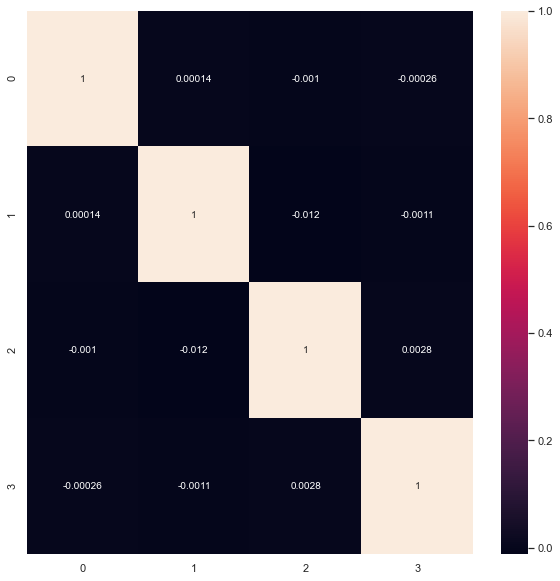

In [500]:

# Plotting the heatmap of the corr matrix
plt.figure(figsize=[10,10])
sns.heatmap(corrmat, annot=True)

# Clustering

### K-Means Clustering

In [501]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [502]:
# k-means with some arbitrary k (number of clusters)
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=5)

In [503]:
kmeans.labels_

array([4, 3, 4, ..., 4, 1, 3])

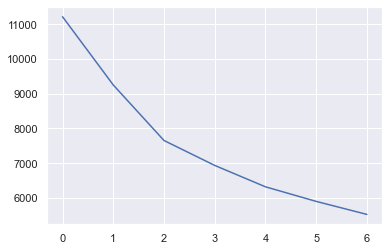

In [504]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

From the elbow method we are unsure of number of clusters to choose and hence will use silhouette analysis

In [505]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_pca_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.34779523714726
For n_clusters=3, the silhouette score is 0.2763748262317988
For n_clusters=4, the silhouette score is 0.2619648111262979
For n_clusters=5, the silhouette score is 0.2132746446214655
For n_clusters=6, the silhouette score is 0.219623500963058
For n_clusters=7, the silhouette score is 0.1986539328390178
For n_clusters=8, the silhouette score is 0.20181297928605507


We can see that 2 has the highest silhouette score hence final model will contain 2 clusters

In [506]:
# final model with k=2 because it has the highest silhouette score
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=42)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=2, random_state=42)

In [507]:
kmeans.labels_

array([1, 0, 1, ..., 1, 0, 0])

In [508]:
ato_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_

<ipython-input-508-f20782d58b4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ato_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_


In [509]:
ato_outliers_removed.head()

,Postcode,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance,K-Means_Cluster_ID
0,2000,25828,26186,-420,26811,280,22080,14998,8571,1219,1
1,2006,53192,69154,4148,54338,876,37440,37177,19577,19776,0
2,2007,31049,33284,-1654,32450,300,18532,8214,9233,4267,1
3,2008,40289,42505,-906,42123,392,18000,7579,10972,9029,1
4,2009,52414,56378,-1393,54867,567,23795,10851,15451,19841,0


# Hierarchical Clustering

In [519]:
X_scaled_df.head()

,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance
0,-2.098002,-2.498987,0.390525,-2.197298,-1.533333,-0.987375,-0.425216,-0.419973,-2.874109
1,1.588025,3.103828,3.310452,1.369803,1.047400,0.472951,1.814918,3.408359,-1.628807
2,-1.394715,-1.573443,-0.398264,-1.466565,-1.446731,-1.324695,-1.110417,-0.189703,-2.669567
3,-0.150054,-0.371070,0.079867,-0.213084,-1.048363,-1.375274,-1.174553,0.415192,-2.350004
4,1.483226,1.437901,-0.231430,1.438354,-0.290598,-0.824325,-0.844073,1.973169,-1.624445


We will now use ward linkage to create a dendrogram as Ward method is the default when unsure of the most suitable method. Further, the experimentation notebook will show that the single and complete linkage method did not perform well for this dataset.

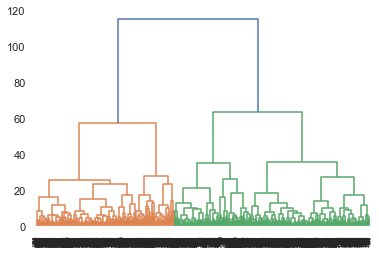

In [516]:
# Ward linkage
w_mergings = linkage(X_scaled_df, method="ward", metric='euclidean')
dendrogram(w_mergings)
plt.show()

Here we can see that both 2 or 4 might be a suitable choice, however, experimentation showed 2 clusters is a more suitable choice.

In [517]:
# 4 clusters using ward
w_cluster_labels = cut_tree(w_mergings, n_clusters=2).reshape(-1, )
w_cluster_labels

array([0, 1, 0, ..., 0, 1, 1])

In [518]:
ato_outliers_removed["Hierarchical_Cluster_labels"] = w_cluster_labels

<ipython-input-518-6eb005c18722>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ato_outliers_removed["Hierarchical_Cluster_labels"] = w_cluster_labels


In [520]:
ato_outliers_removed.head()

,Postcode,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,2000,25828,26186,-420,26811,280,22080,14998,8571,1219,1,0
1,2006,53192,69154,4148,54338,876,37440,37177,19577,19776,0,1
2,2007,31049,33284,-1654,32450,300,18532,8214,9233,4267,1,0
3,2008,40289,42505,-906,42123,392,18000,7579,10972,9029,1,0
4,2009,52414,56378,-1393,54867,567,23795,10851,15451,19841,0,1


We will now plot the cluster results against the variables to see gather insights on cluster formation.

# Analysing Results

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='Median super total accounts balance'>

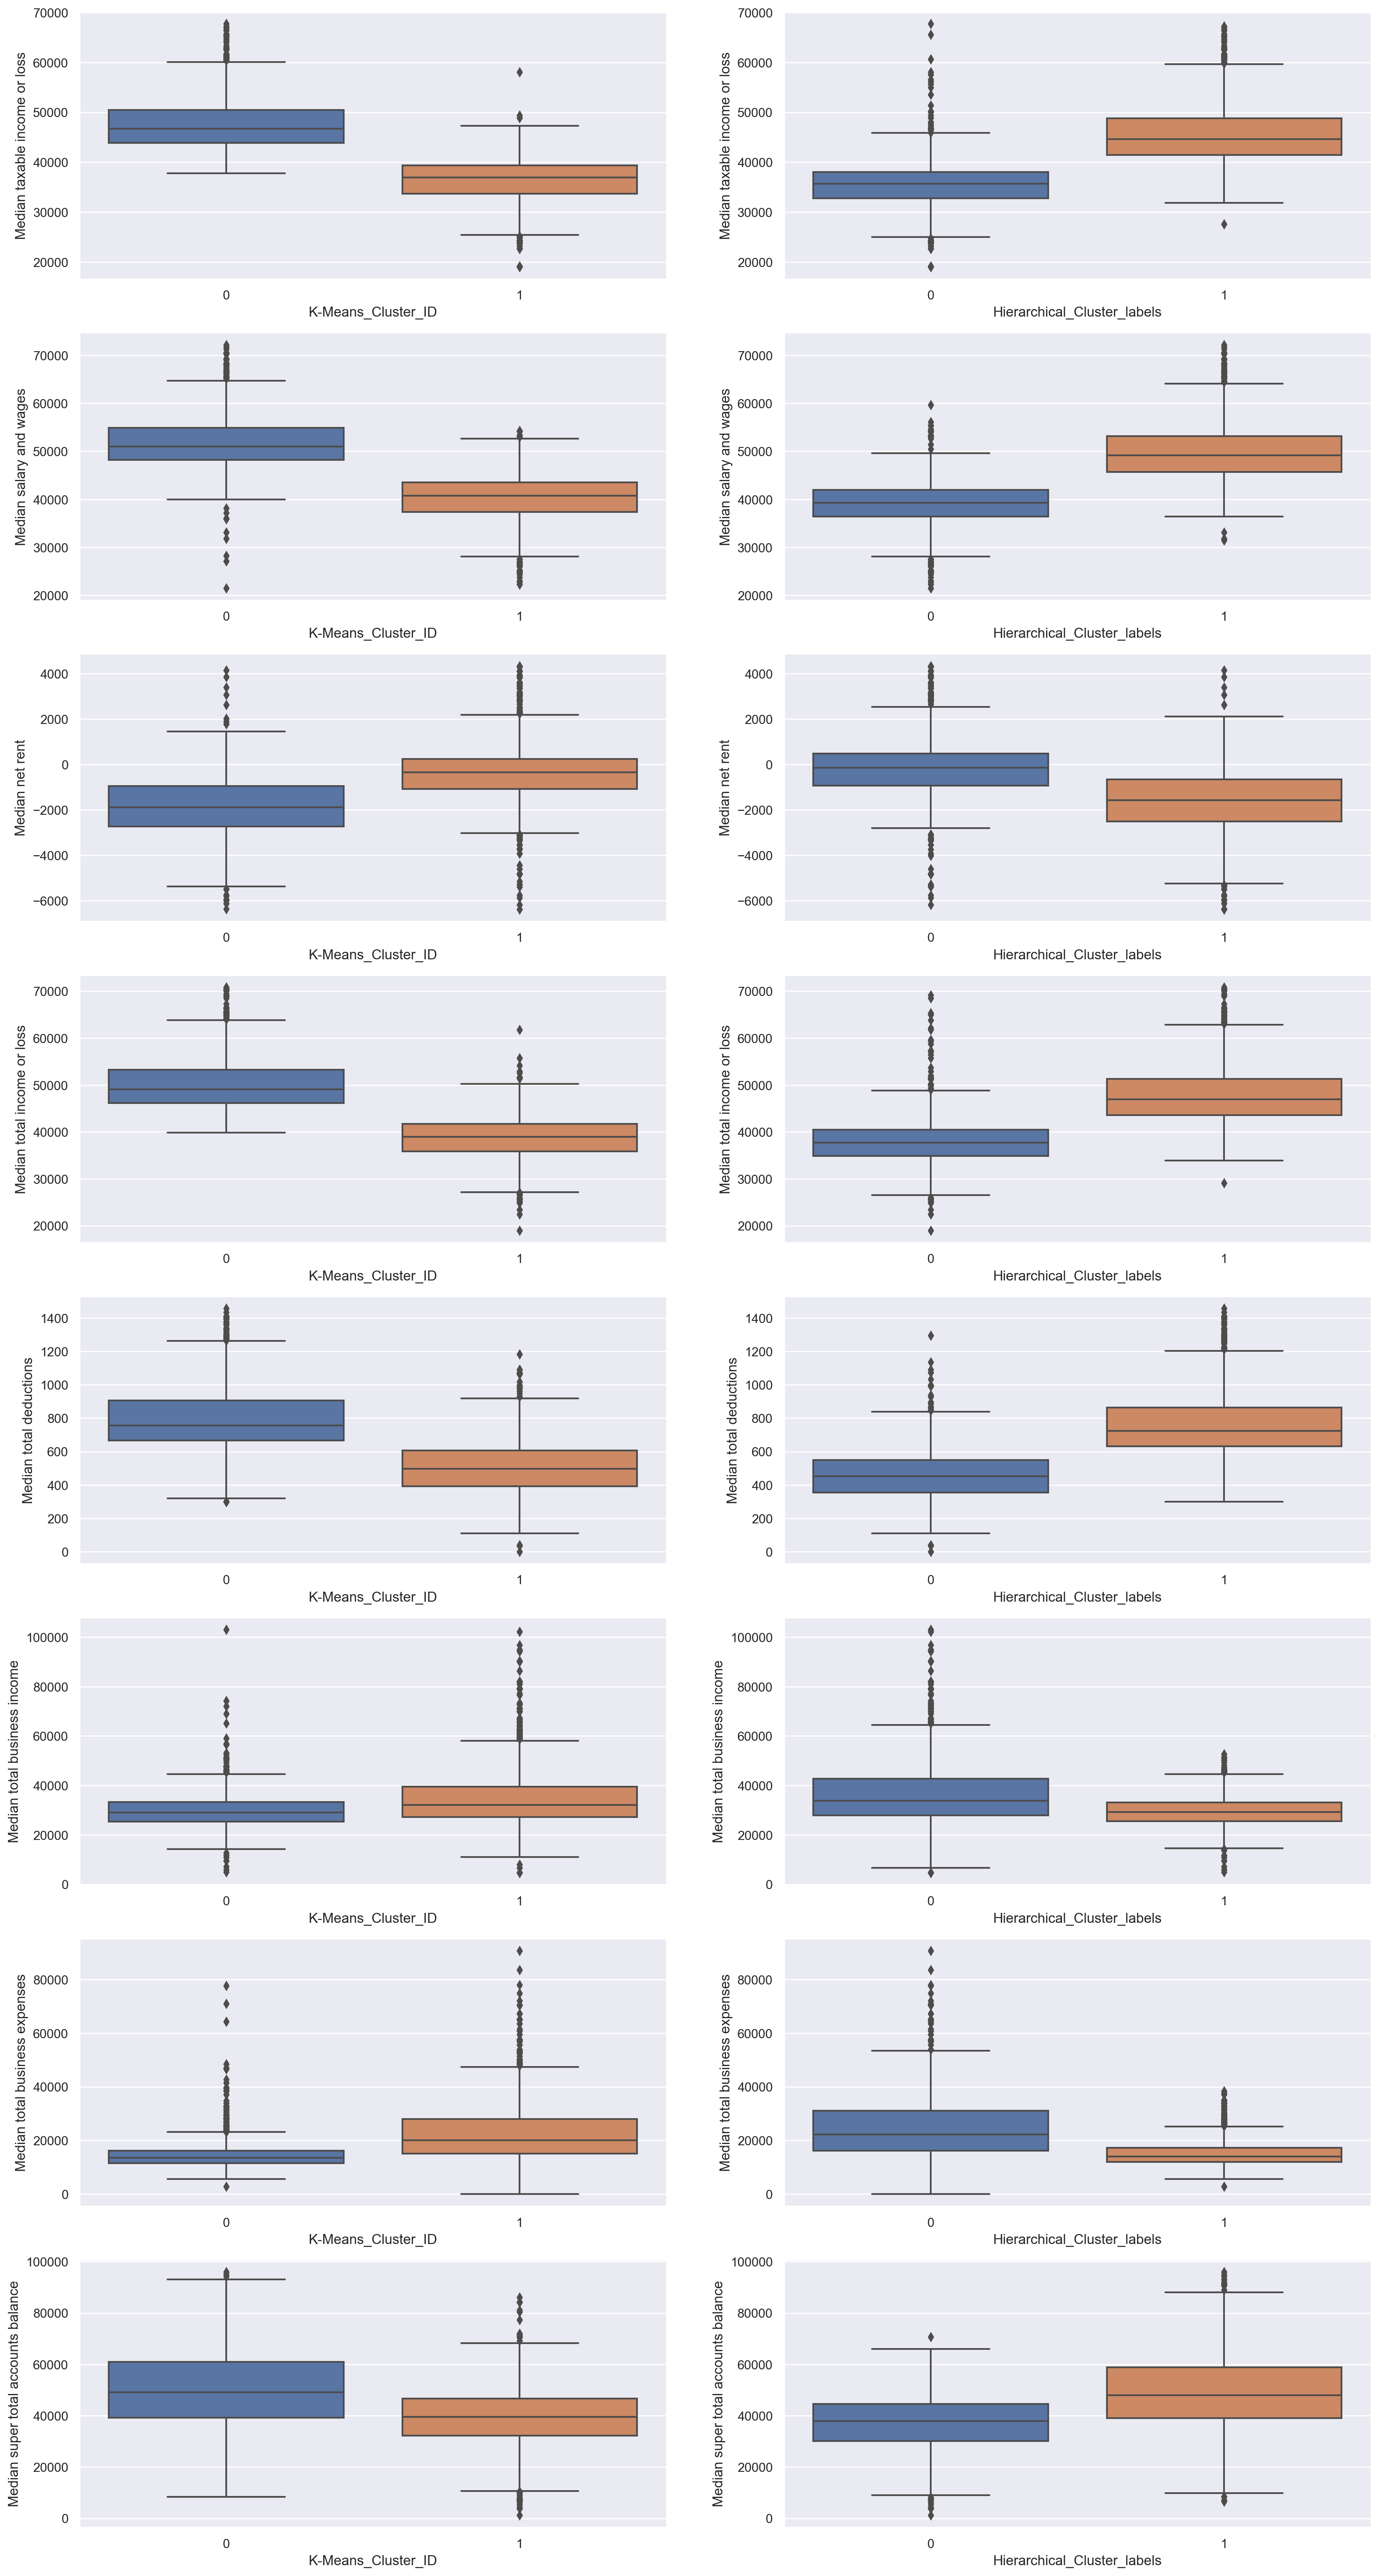

In [521]:
# plotting sub-plots to analyse the results

plt.figure(figsize=(20,40), dpi=200)

plt.subplot(8,2,1)
sns.boxplot(x='K-Means_Cluster_ID', y='Median taxable income or loss', data=ato_outliers_removed)

plt.subplot(8,2,2)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median taxable income or loss', data=ato_outliers_removed)

plt.subplot(8,2,3)
sns.boxplot(x='K-Means_Cluster_ID', y='Median salary and wages', data=ato_outliers_removed)

plt.subplot(8,2,4)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median salary and wages', data=ato_outliers_removed)

plt.subplot(8,2,5)
sns.boxplot(x='K-Means_Cluster_ID', y='Median net rent', data=ato_outliers_removed)

plt.subplot(8,2,6)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median net rent', data=ato_outliers_removed)

plt.subplot(8,2,7)
sns.boxplot(x='K-Means_Cluster_ID', y='Median total income or loss', data=ato_outliers_removed)

plt.subplot(8,2,8)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median total income or loss', data=ato_outliers_removed)

plt.subplot(8,2,9)
sns.boxplot(x='K-Means_Cluster_ID', y='Median total deductions', data=ato_outliers_removed)

plt.subplot(8,2,10)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median total deductions', data=ato_outliers_removed)

plt.subplot(8,2,11)
sns.boxplot(x='K-Means_Cluster_ID', y='Median total business income', data=ato_outliers_removed)

plt.subplot(8,2,12)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median total business income', data=ato_outliers_removed)

plt.subplot(8,2,13)
sns.boxplot(x='K-Means_Cluster_ID', y='Median total business expenses', data=ato_outliers_removed)

plt.subplot(8,2,14)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median total business expenses', data=ato_outliers_removed)

plt.subplot(8,2,15)
sns.boxplot(x='K-Means_Cluster_ID', y='Median super total accounts balance', data=ato_outliers_removed)

plt.subplot(8,2,16)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median super total accounts balance', data=ato_outliers_removed)

From the above box plots, we can see that the Cluster 0 for Kmeans and Cluster 1 for Hierarchical Clustering contains suburbs with high business income, high business expense, and high rent. Interestingly despite owning a business, these suburbs appear to have less taxable income and receive comparatively less deductions. Suburbs in Cluster 1 (Kmeans) & Cluster 0 (Hierarchical)
tend to contain population on salary & wages with high income, recieving more tax deductions and negative median net rent meaning that population in Cluster 1 is infact most earning rent. 

Given that the outliers were dropped due to siginificant impact of K-mean clustering, it is probable that the removal might have impacted cluster results since the population earning more both in terms of income and rent is being getting more tax deductions, which seems counter intuitive given Australian tax laws. Hence we conducted Hierarchical clustering on original data set. 

## Hierarchical Clustering with the Outliers

In [522]:
XALL = ato.drop('Postcode',axis =1)  
yALL = ato['Postcode']

In [523]:
scaler = StandardScaler()
X_scaledALL = scaler.fit_transform(XALL)
X_scaled[:5,:5]

array([[-2.09800189, -2.49898664,  0.39052495, -2.19729752, -1.53333326],
       [ 1.58802545,  3.10382787,  3.310452  ,  1.3698034 ,  1.04740017],
       [-1.39471477, -1.57344257, -0.39826445, -1.46656471, -1.44673147],
       [-0.15005417, -0.37106982,  0.07986722, -0.21308386, -1.04836322],
       [ 1.48322611,  1.43790071, -0.23142973,  1.43835415, -0.29059753]])

In [524]:
XALL.columns

Index(['Median taxable income or loss', 'Median salary and wages',
       'Median net rent', 'Median total income or loss',
       'Median total deductions', 'Median total business income',
       'Median total business expenses', 'Median net tax',
       'Median super total accounts balance'],
      dtype='object')

In [525]:
X_scaled_dfALL = pd.DataFrame(X_scaledALL, columns= XALL.columns)

In [526]:
pcaALL = PCA(random_state=42)
pcaALL.fit(X_scaledALL)

PCA(random_state=42)

In [527]:
pcaALL.explained_variance_ratio_

array([0.51905186, 0.21065232, 0.11505622, 0.06687648, 0.05553613,
       0.01543818, 0.01006554, 0.00672258, 0.00060069])

In [528]:
var_cumuALL = np.cumsum(pca.explained_variance_ratio_)
var_cumuALL

array([0.53425901, 0.70506141, 0.815434  , 0.883031  , 0.93934128,
       0.97135127, 0.98888591, 0.99924054, 1.        ])

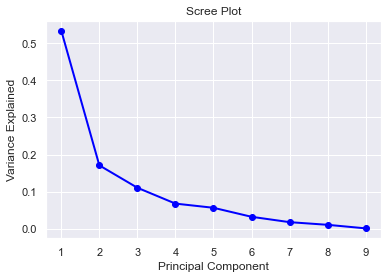

In [529]:
PC_valuesALL = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [530]:
pca_finalALL = IncrementalPCA(n_components=4)

In [531]:
X_pca_finalALL = pca_finalALL.fit_transform(X_scaledALL)

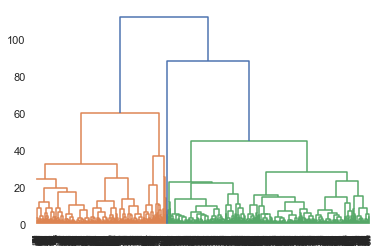

In [532]:
# Ward linkage
w_mergingsALL = linkage(X_scaled_dfALL, method="ward", metric='euclidean')
dendrogram(w_mergingsALL)
plt.show()

Here we can see that we will have to choose two cluster as any number greater than that will result in one cluster with only a few suburbs, this perhaps is the cluster containing outliers.

In [533]:
# 4 clusters using ward
w_cluster_labelsALL = cut_tree(w_mergingsALL, n_clusters=2).reshape(-1, )
w_cluster_labels

array([0, 1, 0, ..., 0, 1, 1])

In [534]:
ato["Hierarchical_Cluster_labels"] = w_cluster_labelsALL

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='Median net tax'>

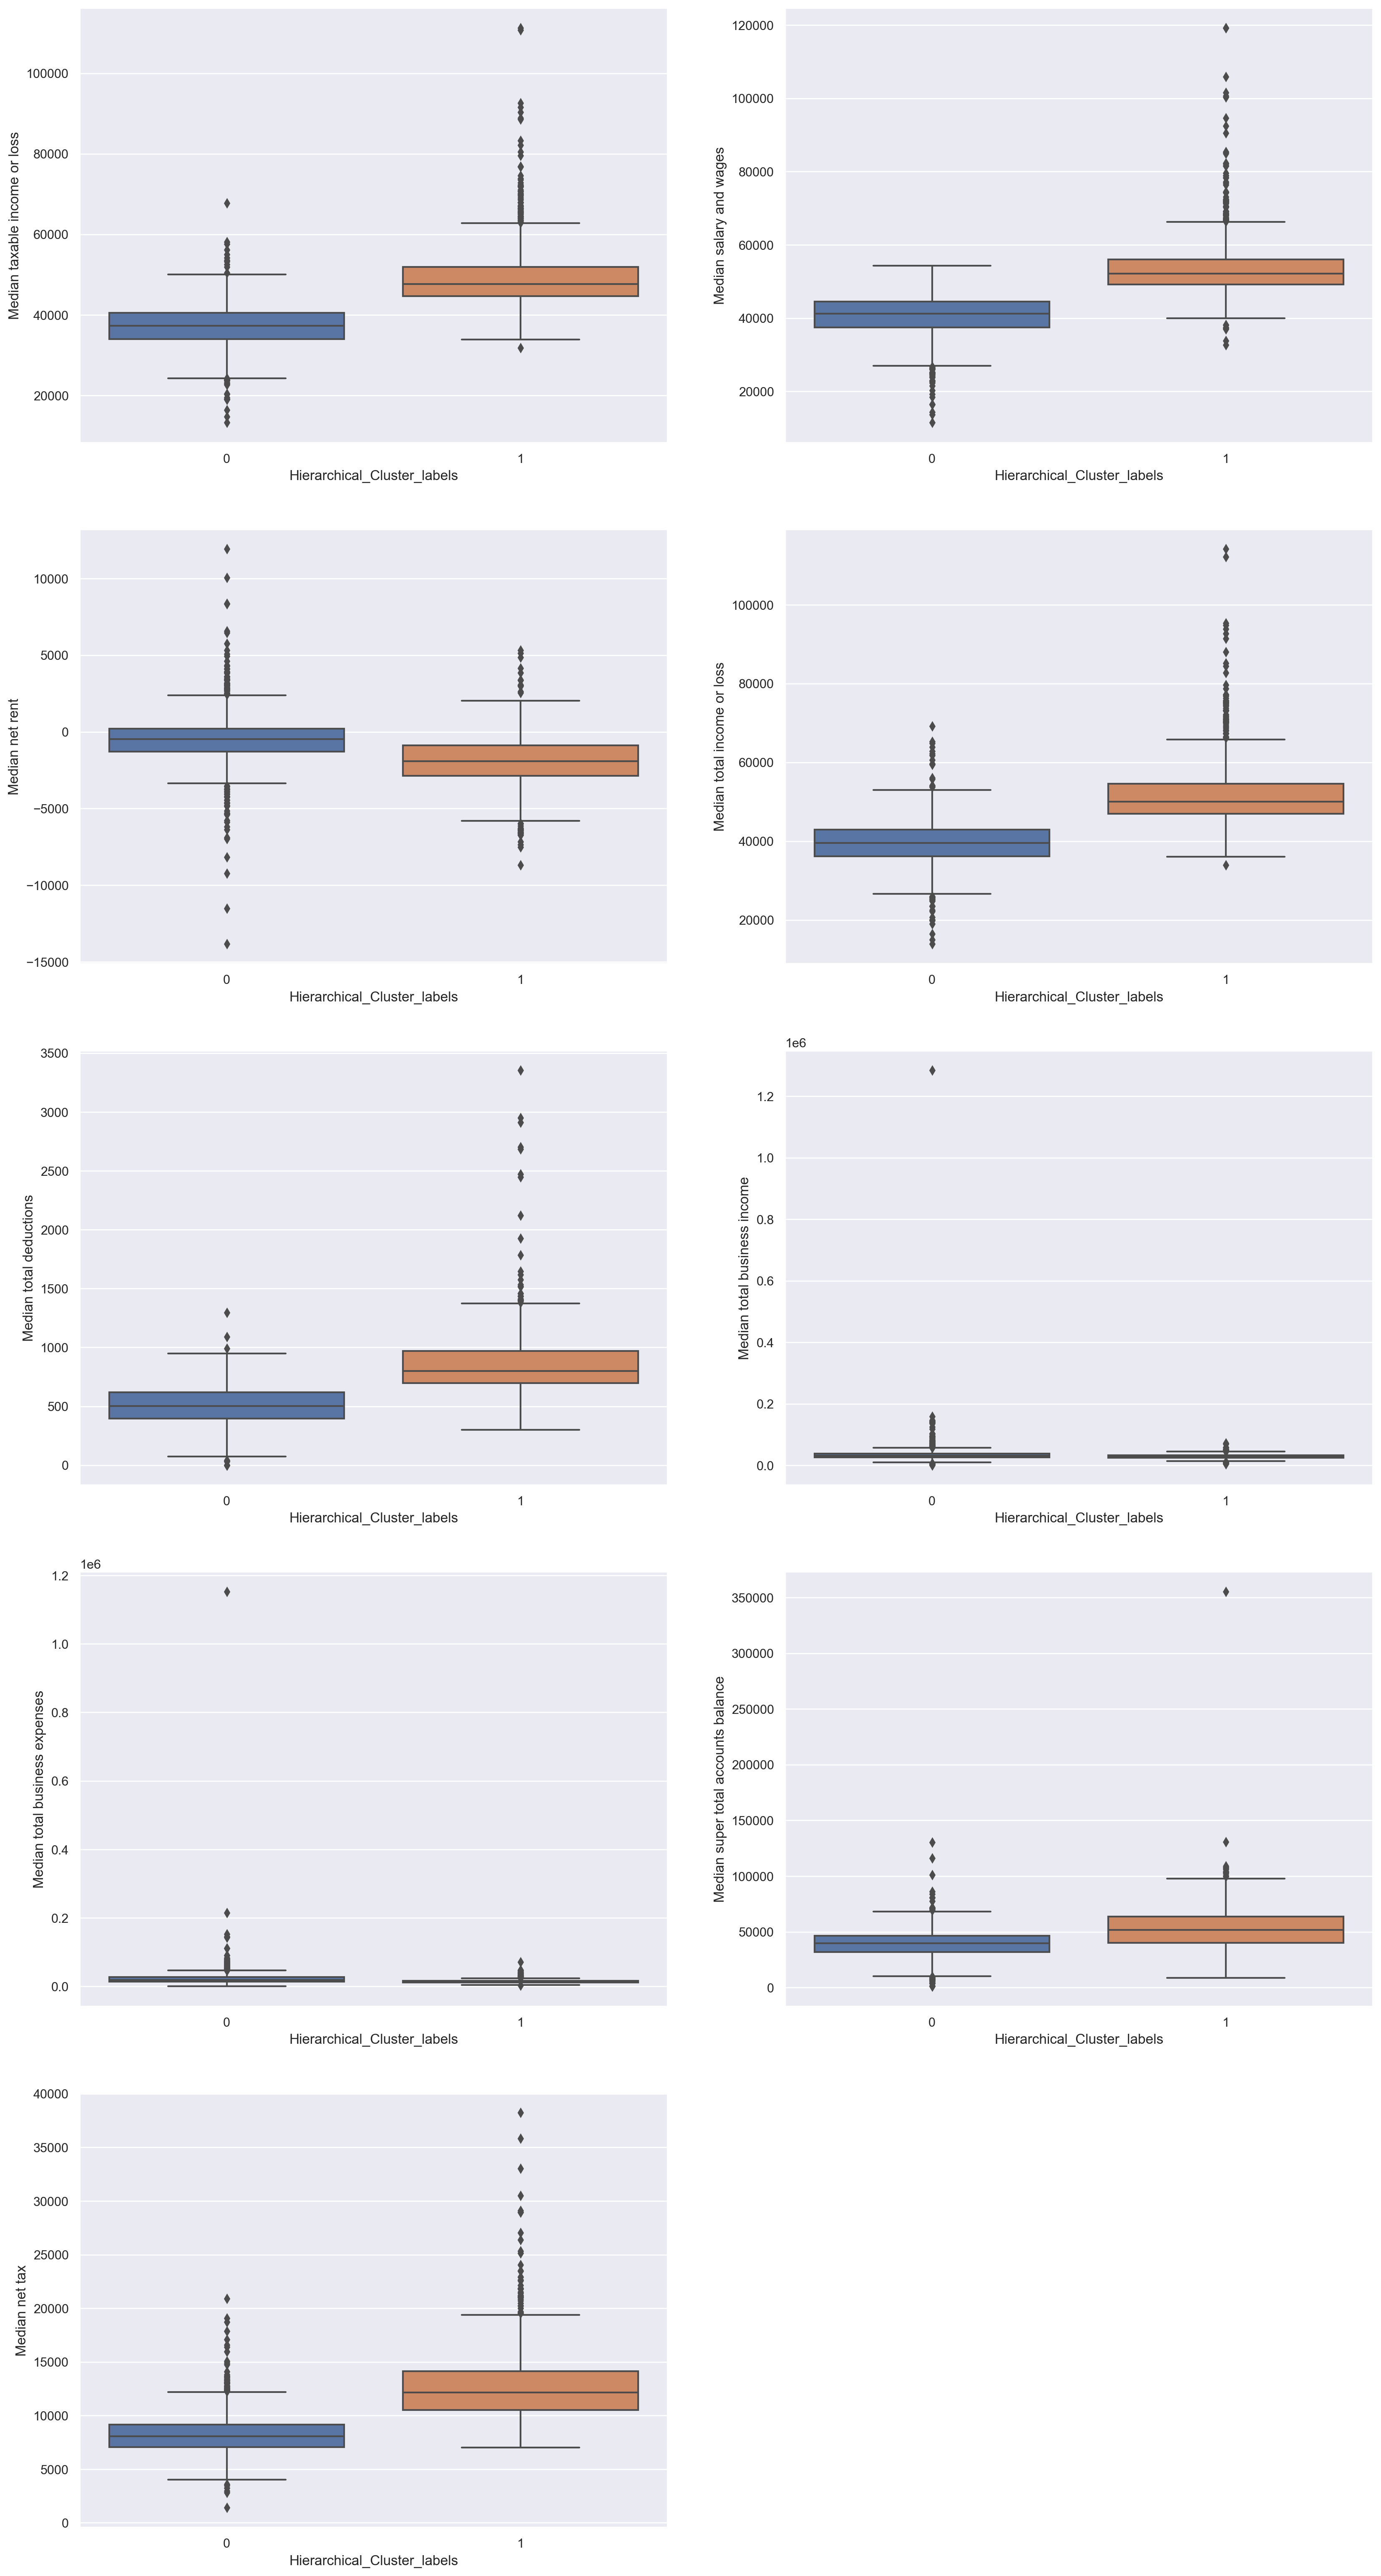

In [539]:
# plotting sub-plots to analyse the results

plt.figure(figsize=(20,40), dpi=200)


plt.subplot(5,2,1)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median taxable income or loss', data=ato)

plt.subplot(5,2,2)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median salary and wages', data=ato)

plt.subplot(5,2,3)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median net rent', data=ato)

plt.subplot(5,2,4)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median total income or loss', data=ato)

plt.subplot(5,2,5)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median total deductions', data=ato)

plt.subplot(5,2,6)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median total business income', data=ato)

plt.subplot(5,2,7)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median total business expenses', data=ato)

plt.subplot(5,2,8)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median super total accounts balance', data=ato)

plt.subplot(5,2,9)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median net tax', data=ato)

Here we can see that the clustering results remain the same and we can suggest that the Australian suburbs can be divided into two groups. One groups that contains suburbs with high business income, expense and rent expense and one with high income, tax payments, tax deductions, super account balance and rent income. 


Since we were interested a separate outliers cluster would look like, we conducted hierarchical clustering with 3 clusters

In [536]:
# 4 clusters using ward
w_cluster_labelsALL3 = cut_tree(w_mergingsALL, n_clusters=3).reshape(-1, )
w_cluster_labelsALL3

array([0, 1, 0, ..., 1, 1, 1])

In [537]:
ato["Hierarchical_Cluster_labels_w3"] = w_cluster_labelsALL3
ato.head()

,Postcode,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance,Hierarchical_Cluster_labels,Hierarchical_Cluster_labels_w3
0,2000,25828,26186,-420,26811,280,22080,14998,8571,1219,0,0
1,2006,53192,69154,4148,54338,876,37440,37177,19577,19776,1,1
2,2007,31049,33284,-1654,32450,300,18532,8214,9233,4267,0,0
3,2008,40289,42505,-906,42123,392,18000,7579,10972,9029,0,0
4,2009,52414,56378,-1393,54867,567,23795,10851,15451,19841,1,1


<AxesSubplot:xlabel='Hierarchical_Cluster_labels_w3', ylabel='Median net tax'>

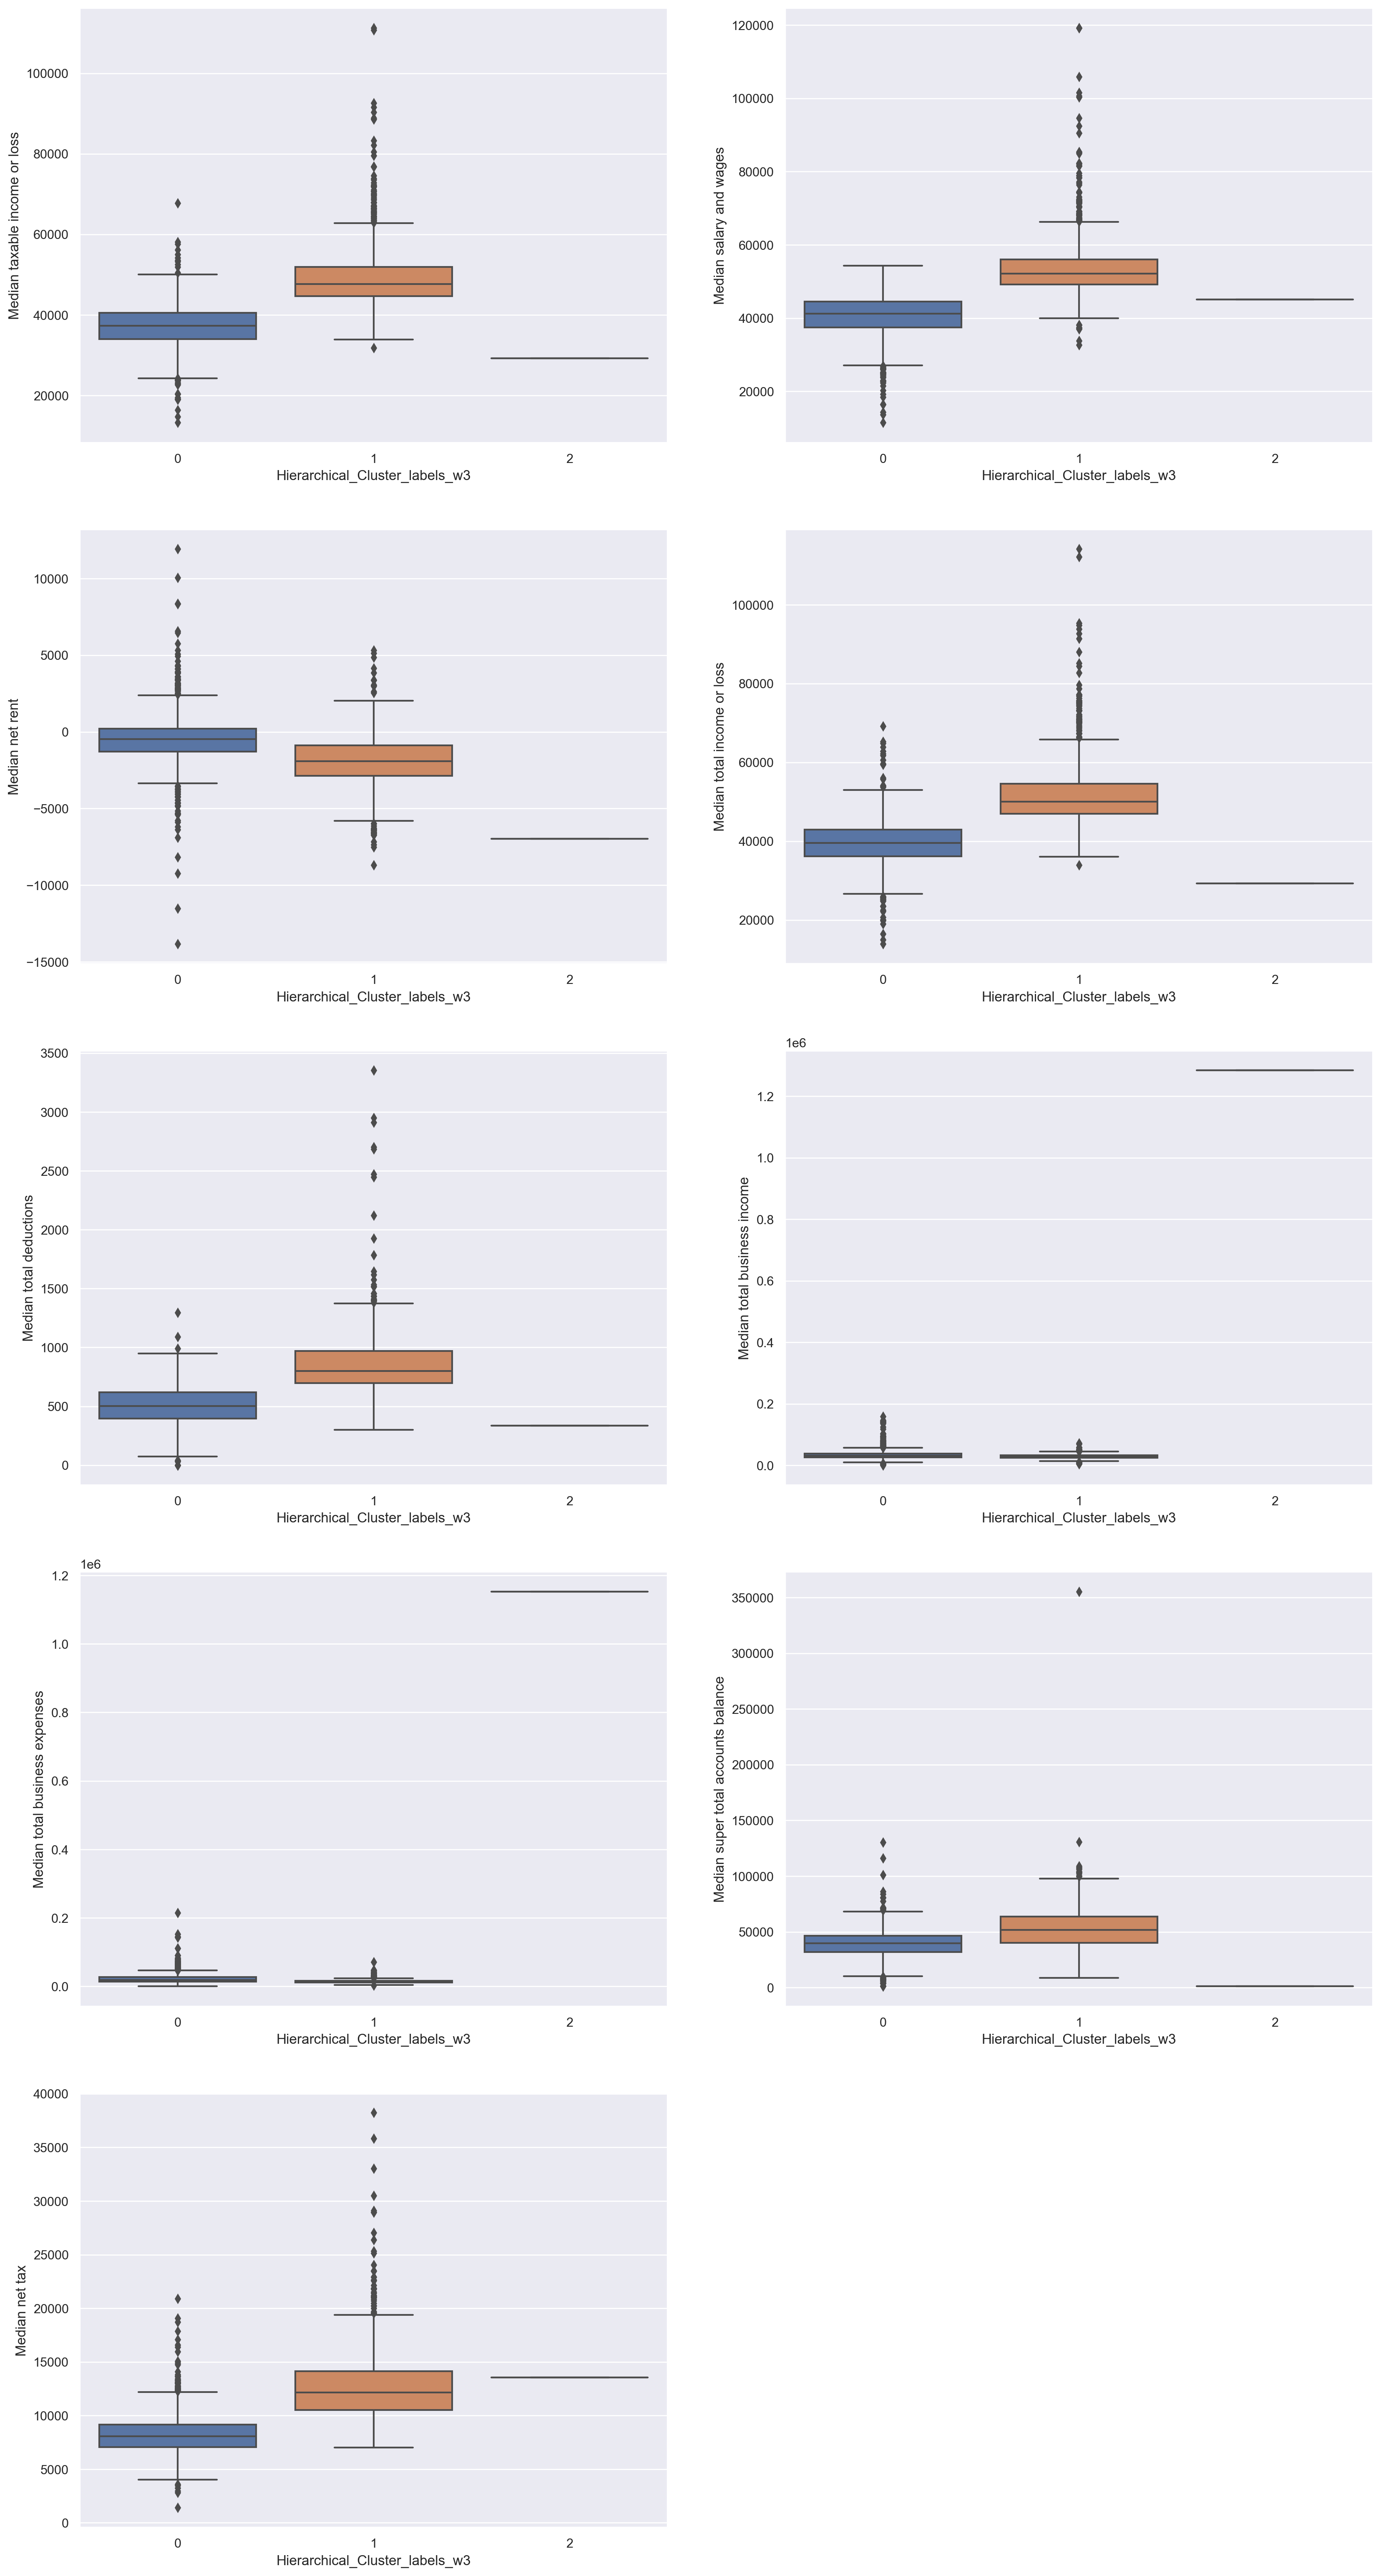

In [540]:
plt.figure(figsize=(20,40), dpi=200)


plt.subplot(5,2,1)
sns.boxplot(x='Hierarchical_Cluster_labels_w3', y='Median taxable income or loss', data=ato)

plt.subplot(5,2,2)
sns.boxplot(x='Hierarchical_Cluster_labels_w3', y='Median salary and wages', data=ato)

plt.subplot(5,2,3)
sns.boxplot(x='Hierarchical_Cluster_labels_w3', y='Median net rent', data=ato)

plt.subplot(5,2,4)
sns.boxplot(x='Hierarchical_Cluster_labels_w3', y='Median total income or loss', data=ato)

plt.subplot(5,2,5)
sns.boxplot(x='Hierarchical_Cluster_labels_w3', y='Median total deductions', data=ato)

plt.subplot(5,2,6)
sns.boxplot(x='Hierarchical_Cluster_labels_w3', y='Median total business income', data=ato)

plt.subplot(5,2,7)
sns.boxplot(x='Hierarchical_Cluster_labels_w3', y='Median total business expenses', data=ato)

plt.subplot(5,2,8)
sns.boxplot(x='Hierarchical_Cluster_labels_w3', y='Median super total accounts balance', data=ato)

plt.subplot(5,2,9)
sns.boxplot(x='Hierarchical_Cluster_labels_w3', y='Median net tax', data=ato)

In [543]:
ato['Hierarchical_Cluster_labels_w3'].value_counts()

0    1498
1     971
2       1
Name: Hierarchical_Cluster_labels_w3, dtype: int64

Here we can see that Cluster 0 and Cluster 1 follow same trend as previous two Clustering results, however, Cluster 2, which contains of only one postcode has very high median business income and expense and rent income however does not pay high tax. 

Further research shows that the Post code in Cluster 2, 6431, is shared by 13 suburbs.